# 입문자를 위한, 파이썬/R 데이터 분석    

]

## (DB분석) SQLite 활용 여성패션 쇼핑몰 데이터분석

1) 내부 데이터를 다른 데이터 분석가가 이용할 수 있도록 정리하고, 

2) 정리한 데이터를 바탕으로 요청사항을 분석 정리합니다

**< Set options >**

In [96]:
import sqlite3
import pandas as pd

In [97]:
# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정
pd.set_option('display.max_columns', 500)

,timestamp,user_id,goods_id,shop_id
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89


**1. data 폴더의 C_team_DB.db에 연결한 뒤 데이터베이스 스키마를 출력해주세요. 그 다음,  order 테이블을 불러와주세요.**

C 팀 데이터 테이블들을 모두 C_team_DB.db 파일에 저장해두었습니다. 저번 주 수업자료를 참고해 database를 조회하고 그 중, order 테이블을 불러와주세요. 테이블이 다음과 같은 모양입니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>timestamp</th>
      <th>user_id</th>
      <th>goods_id</th>
      <th>shop_id</th>
      <th>price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2018-06-11 00:00:43.032</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>1414</td>
      <td>38</td>
      <td>45000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2018-06-11 00:02:33.763</td>
      <td>smDmRnykg61KajpxXKzQ0oNkrh2nuSBj</td>
      <td>1351</td>
      <td>12</td>
      <td>9500</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2018-06-11 00:04:06.364</td>
      <td>EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P</td>
      <td>646</td>
      <td>14</td>
      <td>22000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2018-06-11 00:04:17.258</td>
      <td>KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3</td>
      <td>5901</td>
      <td>46</td>
      <td>29800</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2018-06-11 00:05:26.010</td>
      <td>lq1Je3voA3a0MouSFba3629lKCvweI24</td>
      <td>5572</td>
      <td>89</td>
      <td>29000</td>
    </tr>
  </tbody>
</table>

In [136]:
db_path = './data/C_team_DB.db'
conn = sqlite3.connect(db_path)

schema_query = "SELECT sql FROM sqlite_master WHERE type='table';"
schema = pd.read_sql(schema_query, conn)

# Load the 'order' table
order_query = "SELECT * FROM 'order';"
order_table = pd.read_sql(order_query, conn)

# Close the connection
conn.close()

pd.DataFrame(order_table).head()

,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


In [99]:
# python에서 DB를 다루는 library인 sqlite3와 데이터를 다루는 library인 padas를 import합니다.
import sqlite3

In [100]:
#Write your code here!
# DB 파일과 연결
conn = sqlite3.connect('data/C_team_DB.db')
#conn = sqlite3.connect('C_team_DB.db')
conn

In [101]:
# Sqlite3 과 연결된 DB 테이블 구조 확인 : 
query = "select * from 'sqlite_master'"       # 해당 DB에서 전체 Master 되는 Table 들 조회시 사용
pd.read_sql(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,order,order,3142,"CREATE TABLE ""order"" (\n""timestamp"" TEXT,\n ""..."
1,table,good,good,2,"CREATE TABLE ""good"" (\n""goods_id"" INTEGER,\n ..."
2,table,shop,shop,10,"CREATE TABLE ""shop"" (\n""shop_id"" INTEGER,\n ""..."
3,table,log,log,121,"CREATE TABLE ""log"" (\n""timestamp"" TEXT,\n ""us..."
4,table,user,user,18,"CREATE TABLE ""user"" (\n""user_id"" TEXT,\n ""os""..."


In [102]:
# order table 만 불러오기 :
query = "select * from 'order'"
order = pd.read_sql(query, conn)
order.head()

,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


In [103]:
order.tail()

,timestamp,user_id,goods_id,shop_id,price
862,2018-06-11 23:47:02.003,i_Ar2GyU8xAEeQwzJm6wr60VDB6ofOpK,1065,61,29000
863,2018-06-11 23:50:42.202,49JWS9E7KuSnvv1B7uqMnsiT82ZmtRlO,502,12,12900
864,2018-06-11 23:51:54.449,wuK4KeAhonDy4KHxO8D60fFQsxoo_34c,5318,181,13200
865,2018-06-11 23:54:11.765,GU1JdCza2vj7N-0_YN3JOftW7SRXkWDi,2989,19,18900
866,2018-06-11 23:57:47.896,6xq2ibp39i7HaiTt_dOwWfpMC5UlFLhJ,1659,22,19000


In [104]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  867 non-null    object
 1   user_id    867 non-null    object
 2   goods_id   867 non-null    int64 
 3   shop_id    867 non-null    int64 
 4   price      867 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 34.0+ KB


order 테이블의 각 행은 주문이 일어난 로그를 나타냅니다. 현재는 2018년 6월 11일 하루치 데이터가 들어있습니다.

timestamp는 주문시각, user_id는 주문을 한 유저의 고유 아이디, goods_id는 상품의 id, shop_id는 쇼핑몰의 id, price는 상품의 가격을 나타냅니다.

**2. order 테이블을 이용해 C팀의 당일 매출 상위 10개 쇼핑몰을 구해주세요.**

order 테이블을 이용해 C팀을 통해 이루어진 6월 11일의 쇼핑몰별 매출 정보를 피벗 테이블을 이용하여 구해주세요. 결과는 다음과 같이 나와야 합니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>price</th>
    </tr>
    <tr>
      <th>shop_id</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>22</th>
      <td>1365200</td>
    </tr>
    <tr>
      <th>14</th>
      <td>872000</td>
    </tr>
    <tr>
      <th>63</th>
      <td>710700</td>
    </tr>
    <tr>
      <th>32</th>
      <td>707900</td>
    </tr>
    <tr>
      <th>126</th>
      <td>669400</td>
    </tr>
    <tr>
      <th>6</th>
      <td>655900</td>
    </tr>
    <tr>
      <th>11</th>
      <td>653000</td>
    </tr>
    <tr>
      <th>60</th>
      <td>558300</td>
    </tr>
    <tr>
      <th>19</th>
      <td>518400</td>
    </tr>
    <tr>
      <th>12</th>
      <td>446900</td>
    </tr>
  </tbody>
</table>

In [130]:
# Filter for orders on June 11th
order_table['timestamp'] = pd.to_datetime(order_table['timestamp'])
filtered_orders = order_table[order_table['timestamp'].dt.date == pd.to_datetime('2018-06-11').date()]

# Create a pivot table for sales per shop_id
pivot_table = filtered_orders.pivot_table(values='price', index='shop_id', aggfunc='sum').reset_index()

# Sort by price in descending order
pivot_table = pivot_table.sort_values(by='price', ascending=False)

pivot_table.head(10)

,shop_id,price
20,22,1365200
12,14,872000
46,63,710700
28,32,707900
91,126,669400
5,6,655900
9,11,653000
44,60,558300
17,19,518400
10,12,446900


**3. 판매 건수를 포함하여 피벗테이블을 만들어주세요. 또한, 상위 10개 쇼핑몰의 매출을 막대그래프로 보여주세요.**

같은 횟수의 거래라도 제품의 가격이 비싸면 매출이 크게 나오게 되어있습니다. 상대적으로 저렴한 물품을 파는 쇼핑몰들은 결제 건수에 비해 매출이 적을 수 있습니다.

매출과 결제 건수를 함께 볼 수 있는 피벗테이블을 작성해주세요. 그리고, 그 결과를 막대그래프로 시각화하여 보여주세요. 결과는 다음과 같이 나오게됩니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sum</th>
      <th>count</th>
    </tr>
    <tr>
      <th>shop_id</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>22</th>
      <td>1365200</td>
      <td>99</td>
    </tr>
    <tr>
      <th>14</th>
      <td>872000</td>
      <td>30</td>
    </tr>
    <tr>
      <th>63</th>
      <td>710700</td>
      <td>27</td>
    </tr>
    <tr>
      <th>32</th>
      <td>707900</td>
      <td>37</td>
    </tr>
    <tr>
      <th>126</th>
      <td>669400</td>
      <td>39</td>
    </tr>
    <tr>
      <th>6</th>
      <td>655900</td>
      <td>24</td>
    </tr>
    <tr>
      <th>11</th>
      <td>653000</td>
      <td>19</td>
    </tr>
    <tr>
      <th>60</th>
      <td>558300</td>
      <td>23</td>
    </tr>
    <tr>
      <th>19</th>
      <td>518400</td>
      <td>19</td>
    </tr>
    <tr>
      <th>12</th>
      <td>446900</td>
      <td>42</td>
    </tr>
  </tbody>
</table>

![](https://i.imgur.com/T6VRYf6.png)

In [106]:
## 시각화 표현을 위한 Import :
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

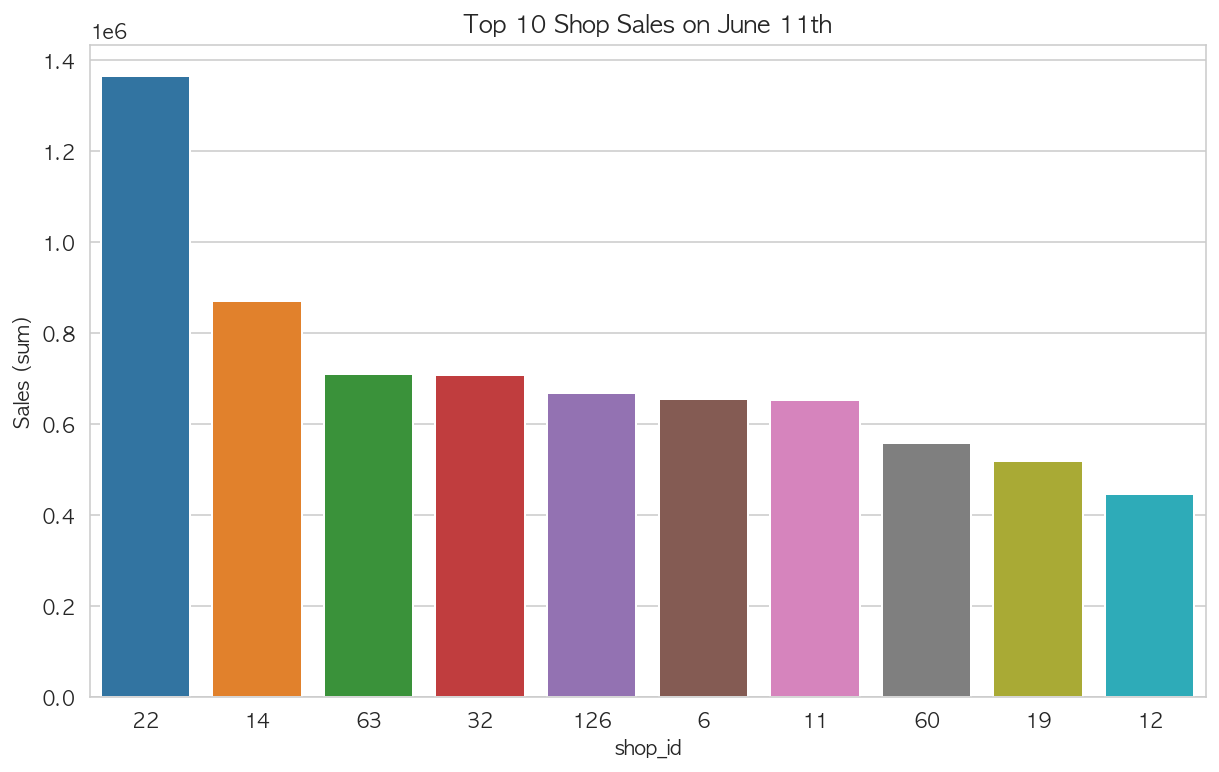

In [137]:
# 아까 지정한 날짜 데이터
order_table['timestamp'] = pd.to_datetime(order_table['timestamp'])
filtered_orders = order_table[order_table['timestamp'].dt.date == pd.to_datetime('2018-06-11').date()]


pivot_table = filtered_orders.pivot_table(values='price', index='shop_id', aggfunc=['sum', 'count']).reset_index()

# 컬럼 가져오기
pivot_table.columns = ['shop_id', 'sum', 'count']

# 정렬
pivot_table = pivot_table.sort_values(by='sum', ascending=False).head(10)


# 생성. 임의의 사이즈로, 
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_table, x='shop_id', y='sum', order=pivot_table['shop_id'])
plt.xlabel('shop_id')
plt.ylabel('Sales (sum)')
plt.title('Top 10 Shop Sales on June 11th')
plt.show()


**4. 시간대별 C팀 매출을 구하려고 합니다. lineplot을 이용하여 6월 11일의 시간대별 매출을 시각화 해주세요.**

C팀 이용자들의 구매 패턴을 알아보려고 합니다. timestamp를 to_datetime을 이용하여 datetime 자료형으로 만든 뒤, 이를 이용하여 시간대별 총 매출량을 구해주세요.

x를 timestamp, y를 price로 놓는 경우 다음과 같은 그래프가 나오게 됩니다. 

![](https://i.imgur.com/5cqEAAj.png)

In [108]:
## 시각화 표현을 위한 Import :
import matplotlib as mpl
sns.set_style('whitegrid') #스타일은 원하는 것을 사용하세요.
mpl.rc('font', family='AppleGothic') # Mac의 경우는 AppleGothic, 윈도우의 경우는 Malgun Gothic을 사용하면 됩니다 :) 
mpl.rc('axes', unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/var/folders/wg/_dw7rbn14xl_4vkcr1327d040000gn/T/ipykernel_4870/1129832502.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


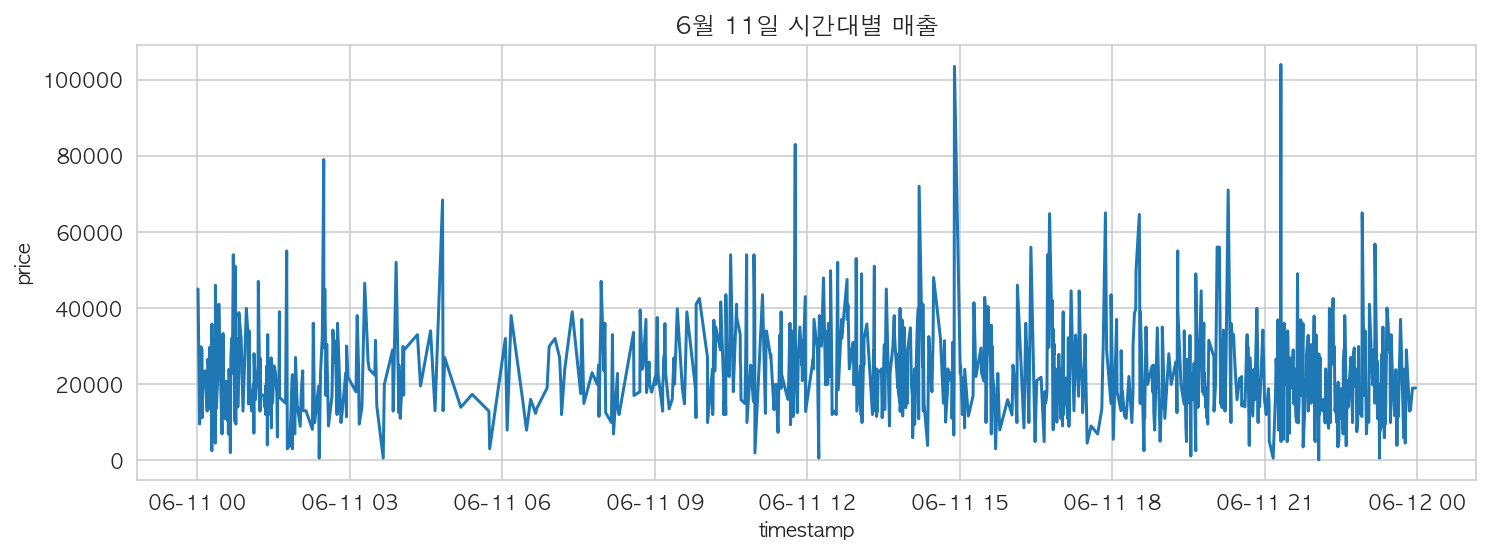

In [109]:
# Convert timestamp to datetime
order_table['timestamp'] = pd.to_datetime(order_table['timestamp'])

# Filter for orders on June 11th
filtered_orders = order_table[order_table['timestamp'].dt.date == pd.to_datetime('2018-06-11').date()]

# Plot the results
plt.figure(figsize=(12, 4))
sns.lineplot(data=filtered_orders, x='timestamp', y='price')
plt.xlabel('timestamp')
plt.ylabel('price')
plt.title('6월 11일 시간대별 매출')
plt.show()

**5. 위의 시각화를 구간화(binning) 작업을 거쳐 보기 좋은 형태로 만들어주세요.**

위의 시각화는 적절하지 못한 시각화입니다. 정확하게는 x시 00분 ~ x시 59분 까지의 매출을 시간대별로 모두 합하는 binning 과정을 거친 뒤 시각화를 진행해야 원하는 결과를 얻을 수 있습니다.

order 테이블에 로그의 발생 시간을 나타내는 hour 칼럼을 추가한 뒤, pivot_table을 이용하여 시간대별 매출을 구해주세요. 그리고, 이를 이용해 아래와 같은 그래프를 만들어 주세요.

*lineplot을 사용하는 경우*
![](https://i.imgur.com/sGVLJKi.png)

*pointplot을 사용하는 경우*
![](https://i.imgur.com/hYuKVqE.png)

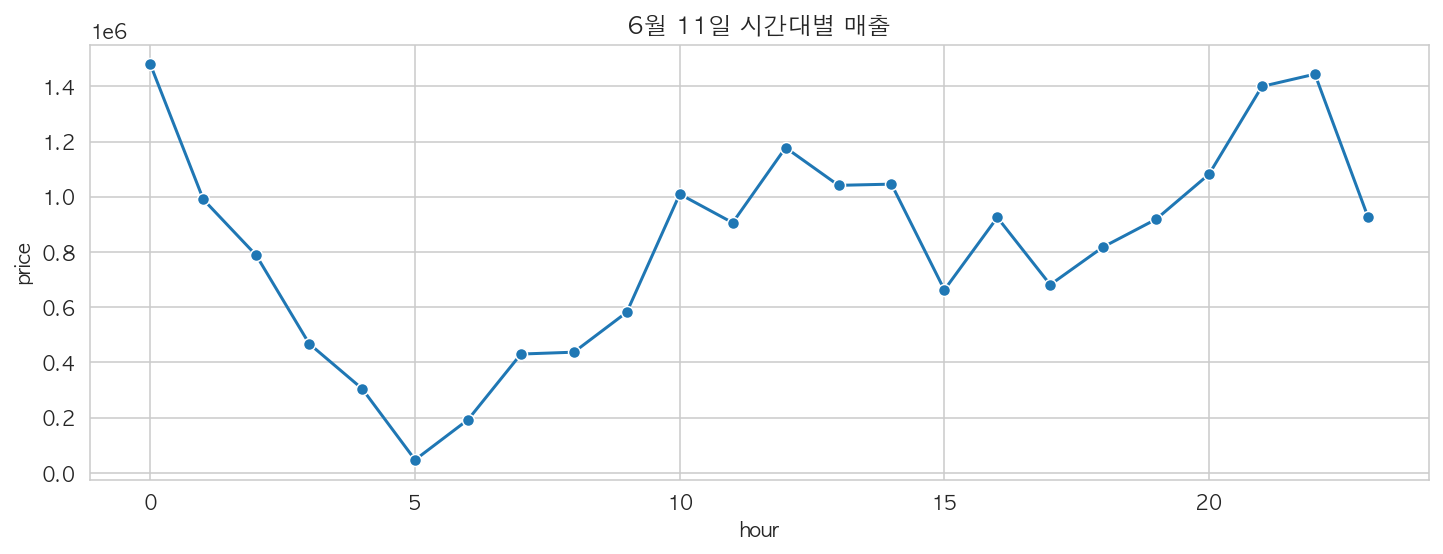

In [110]:
#Write your code here!
# Convert timestamp to datetime
order_table['timestamp'] = pd.to_datetime(order_table['timestamp'])

# Extract hour from timestamp
order_table['hour'] = order_table['timestamp'].dt.hour

# Create a pivot table to sum sales by hour
hourly_sales = order_table.pivot_table(values='price', index='hour', aggfunc='sum').reset_index()

# Plot the results
plt.figure(figsize=(12, 4))
sns.lineplot(data=hourly_sales, x='hour', y='price', marker='o')
plt.xlabel('hour')
plt.ylabel('price')
plt.title('6월 11일 시간대별 매출')
plt.show()

**6 . user 테이블을 불러와 order 테이블과 병합해주세요.**

user 테이블에는 고객의 고유 아이디를 나타내는 user_id, 그리고 접속 기기정보를 나타내는 os, 그리고 나이정보 age가 있습니다. 이를 이용해 top 10 쇼핑몰 매출이 어떤 연령층에서 발생했는지 분석하고자 합니다. 데이터베이스에서 user 테이블을 불러온 뒤, order 테이블과 병합해주세요.

병합 결과는 다음과 같이 나오게 됩니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>timestamp</th>
      <th>user_id</th>
      <th>goods_id</th>
      <th>shop_id</th>
      <th>price</th>
      <th>hour</th>
      <th>os</th>
      <th>age</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2018-06-11 00:00:43.032</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>1414</td>
      <td>38</td>
      <td>45000</td>
      <td>0</td>
      <td>iOS</td>
      <td>39</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2018-06-11 00:02:33.763</td>
      <td>smDmRnykg61KajpxXKzQ0oNkrh2nuSBj</td>
      <td>1351</td>
      <td>12</td>
      <td>9500</td>
      <td>0</td>
      <td>And</td>
      <td>17</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2018-06-11 00:04:06.364</td>
      <td>EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P</td>
      <td>646</td>
      <td>14</td>
      <td>22000</td>
      <td>0</td>
      <td>And</td>
      <td>-1</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2018-06-11 00:04:17.258</td>
      <td>KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3</td>
      <td>5901</td>
      <td>46</td>
      <td>29800</td>
      <td>0</td>
      <td>And</td>
      <td>34</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2018-06-11 00:05:26.010</td>
      <td>lq1Je3voA3a0MouSFba3629lKCvweI24</td>
      <td>5572</td>
      <td>89</td>
      <td>29000</td>
      <td>0</td>
      <td>And</td>
      <td>17</td>
    </tr>
  </tbody>
</table>

In [111]:
import pandas as pd
import sqlite3

# Connect to the database
conn = sqlite3.connect('./data/C_team_DB.db')

# Load the user table
user_df = pd.read_sql_query("SELECT * FROM user", conn)

# Load the order table
order_df = pd.read_sql_query("SELECT * FROM 'order'", conn)

# Merge the tables on user_id
merged_df = pd.merge(order_df, user_df, on='user_id')

# Set display options to better format the output
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Set width to avoid line breaks
pd.set_option('display.colheader_justify', 'center')  # Center align headers

# Display the merged DataFrame
print(merged_df.head())

# Close the database connection
conn.close()




         timestamp                      user_id               goods_id  shop_id  price  os   age
0  2018-06-11 00:00:43.032  bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx    1414      38     45000  iOS  39 
1  2018-06-11 00:02:33.763  smDmRnykg61KajpxXKzQ0oNkrh2nuSBj    1351      12      9500  And  17 
2  2018-06-11 00:04:06.364  EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P     646      14     22000  And  -1 
3  2018-06-11 00:04:17.258  KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3    5901      46     29800  And  34 
4  2018-06-11 00:05:26.010  lq1Je3voA3a0MouSFba3629lKCvweI24    5572      89     29000  And  17 


**7. 매출 Top 10 쇼핑몰 구매자들의 연령대를 쇼핑몰별로 시각화하여 보여주세요.**

위의 병합된 테이블을 이용하여, 당일 매출 Top 10 쇼핑몰에서 구매를 한 고객들의 연령대 분포를 시각화로 표현하고자 합니다. 이를 이용해 쇼핑몰이 설정한 타겟 연령대와 실제 구매층이 일치하는지를 비교해보고자 합니다.

나이 정보가 없는 경우는 -1이 입력되어 있기 때문에 이를 처리한 다음 시각화를 해야 합니다. 시각화 결과가 아래의 둘 중 하나가 나오게 해주세요.

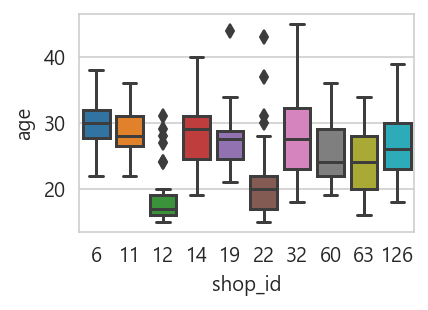

In [112]:
pd.np.nan

/var/folders/wg/_dw7rbn14xl_4vkcr1327d040000gn/T/ipykernel_4870/2269831909.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.nan


nan

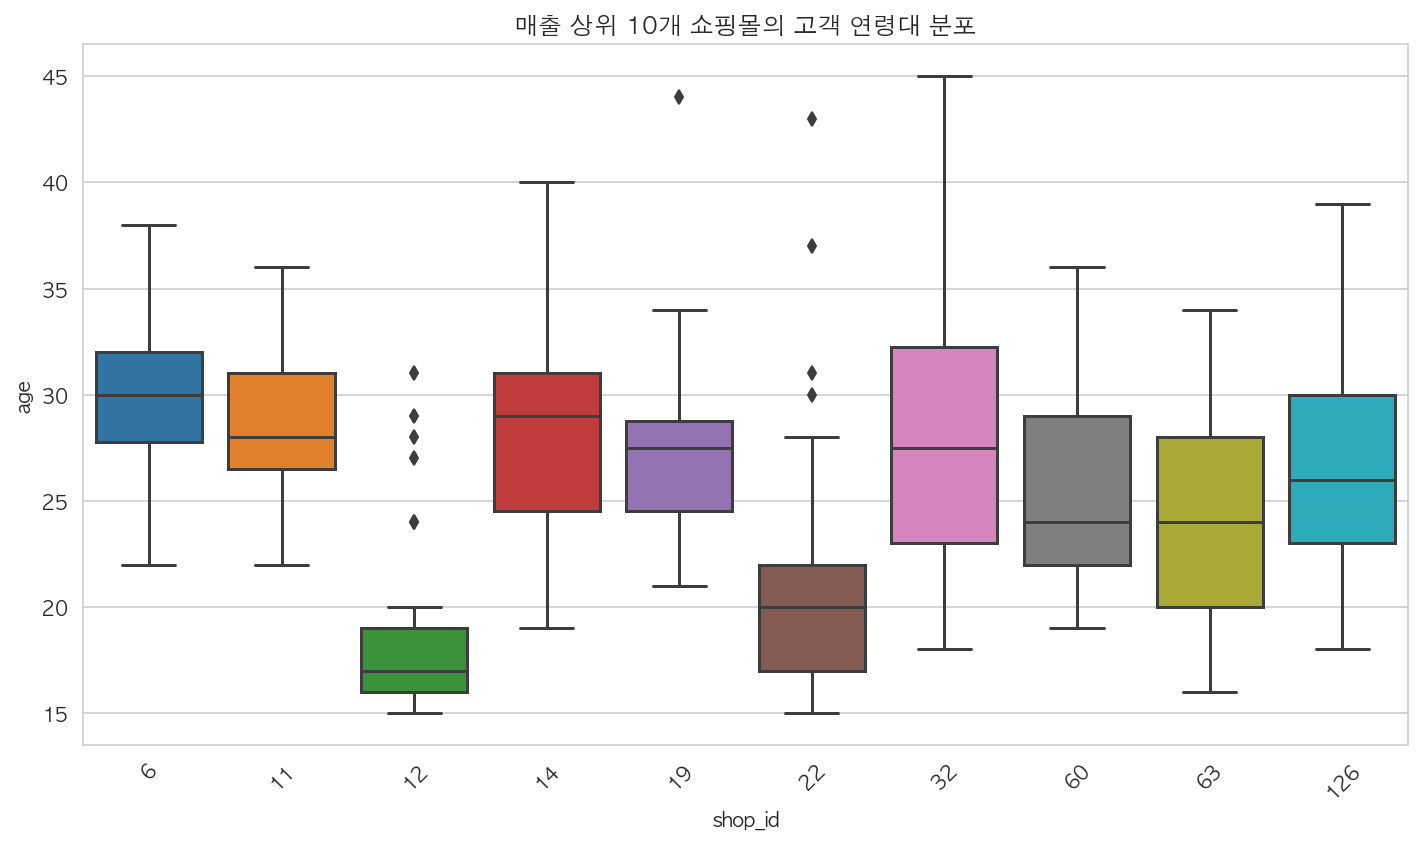

In [113]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터베이스에 연결
conn = sqlite3.connect('./data/C_team_DB.db')

# user 테이블 불러오기
user_df = pd.read_sql_query("SELECT * FROM user", conn)

# order 테이블 불러오기
order_df = pd.read_sql_query("SELECT * FROM 'order'", conn)

# user_id를 기준으로 테이블 병합
merged_df = pd.merge(order_df, user_df, on='user_id')

# 나이 정보가 -1인 경우 NaN으로 처리
merged_df['age'] = merged_df['age'].replace(-1, np.nan)

# 각 쇼핑몰의 총 매출 계산
shop_revenue = merged_df.groupby('shop_id')['price'].sum().reset_index()

# 매출 상위 10개 쇼핑몰 선택
top_10_shops = shop_revenue.nlargest(10, 'price')

# 상위 10개 쇼핑몰 데이터를 병합하여 연령 정보 포함
top_10_shops_data = pd.merge(merged_df, top_10_shops, on='shop_id')

# 박스 플롯으로 연령대 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='shop_id', y='age', data=top_10_shops_data)
plt.xlabel('shop_id')
plt.ylabel('age')
plt.title('매출 상위 10개 쇼핑몰의 고객 연령대 분포')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()

# 데이터베이스 연결 종료
conn.close()


**8. user 테이블에 연령대를 나타내는 칼럼을 만들어주세요. 그리고 쇼핑몰이 설정한 타겟 연령대와 실제로 구매를 한 고객의 연령과 일치하는지를 검증해주세요.**

C팀의 쇼핑몰들은 아래의 필터에서 보여지는 것과 같이 타겟 연령대를 가지고 있습니다. 하지만, 실제 구매가 설정되어 있는 타겟 연령대에 맞게 이루어지는지 꾸준히 검증이 이루어져야 합니다. 유저에게 더 적합한 제품이나 쇼핑몰을 추천해주어 유저 경험 (UX)를 증진시키는 것은 추천 플랫폼에게 매우 중요한 요소이기 때문입니다.

<img src="https://i.imgur.com/HMd9xC2.jpg" width=300>

수행해야 할 작업은 총 3단계입니다.

    1. 실제 나이를 바탕으로 user 테이블에 연령대 칼럼을 만들기
    2. shop 테이블을 불러와 user, order 테이블과 병합하기
    3. 쇼핑몰의 타겟 연령대와 해당 쇼핑몰에서의 결제를 한 고객의 연령대를 비교하기

아래의 함수를 이용해 user 테이블에 연령대를 만들어주세요.

In [114]:
import pandas as pd
import sqlite3
import numpy as np

# 연령대 생성 함수
def make_generation(age):
    if 10 <= age < 20:
        return '10대'
    elif 20 <= age < 23:
        return '20대 초반'
    elif 23 <= age < 27:
        return '20대 중반'
    elif 27 <= age < 30:
        return '20대 후반'
    elif 30 <= age < 33:
        return '30대 초반'
    elif 33 <= age < 37:
        return '30대 중반'
    elif 37 <= age < 40:
        return '30대 후반'
    elif 40 <= age < 43:
        return '40대 초반'
    elif 43 <= age < 47:
        return '40대 중반'
    elif 47 <= age < 50:
        return '40대 후반'
    else:
        return '기타'


# 데이터베이스에 연결
conn = sqlite3.connect('./data/C_team_DB.db')

# user 테이블 불러오기
user_df = pd.read_sql_query("SELECT * FROM user", conn)

# 나이 정보가 -1인 경우 NaN으로 처리
user_df['age'] = user_df['age'].replace(-1, np.nan)

# 연령대 칼럼 추가
user_df['generation'] = user_df['age'].apply(make_generation)

# 데이터베이스 연결 종료
conn.close()

user_df.head()


,user_id,os,age,generation
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41.0,40대 초반
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31.0,30대 초반
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16.0,10대
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41.0,40대 초반
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42.0,40대 초반


shop 테이블을 DB에서 불러와 주세요. 그 다음, user, order 테이블과 병합해주세요.

병합 결과는 다음과 같게 됩니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>timestamp</th>
      <th>user_id</th>
      <th>goods_id</th>
      <th>shop_id</th>
      <th>price</th>
      <th>hour</th>
      <th>os</th>
      <th>age_x</th>
      <th>연령대</th>
      <th>name</th>
      <th>category</th>
      <th>age_y</th>
      <th>style</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2018-06-11 00:00:43.032</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>1414</td>
      <td>38</td>
      <td>45000</td>
      <td>0</td>
      <td>iOS</td>
      <td>39</td>
      <td>30대 후반</td>
      <td>Mabel</td>
      <td>의류</td>
      <td>20대 후반/30대 초반/30대 중반</td>
      <td>모던시크/페미닌</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2018-06-11 07:33:39.823</td>
      <td>ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL</td>
      <td>2278</td>
      <td>38</td>
      <td>37000</td>
      <td>7</td>
      <td>And</td>
      <td>32</td>
      <td>30대 초반</td>
      <td>Mabel</td>
      <td>의류</td>
      <td>20대 후반/30대 초반/30대 중반</td>
      <td>모던시크/페미닌</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2018-06-11 12:56:27.867</td>
      <td>MnvhmV0tA89bN9TLXgRTbLza689bTkT9</td>
      <td>5513</td>
      <td>38</td>
      <td>31000</td>
      <td>12</td>
      <td>And</td>
      <td>37</td>
      <td>30대 후반</td>
      <td>Mabel</td>
      <td>의류</td>
      <td>20대 후반/30대 초반/30대 중반</td>
      <td>모던시크/페미닌</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2018-06-11 22:57:11.582</td>
      <td>3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB</td>
      <td>7026</td>
      <td>38</td>
      <td>17100</td>
      <td>22</td>
      <td>iOS</td>
      <td>34</td>
      <td>30대 중반</td>
      <td>Mabel</td>
      <td>의류</td>
      <td>20대 후반/30대 초반/30대 중반</td>
      <td>모던시크/페미닌</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2018-06-11 00:02:33.763</td>
      <td>smDmRnykg61KajpxXKzQ0oNkrh2nuSBj</td>
      <td>1351</td>
      <td>12</td>
      <td>9500</td>
      <td>0</td>
      <td>And</td>
      <td>17</td>
      <td>10대 후반</td>
      <td>Rachel</td>
      <td>의류</td>
      <td>10대/20대 초반</td>
      <td>러블리/심플베이직</td>
    </tr>
  </tbody>
</table>

In [115]:
# 데이터베이스에 연결
conn = sqlite3.connect('./data/C_team_DB.db')

# order 테이블 불러오기
order_df = pd.read_sql_query("SELECT * FROM 'order'", conn)

# shop 테이블 불러오기
shop_df = pd.read_sql_query("SELECT * FROM shop", conn)

# user_id를 기준으로 user와 order 테이블 병합
merged_df = pd.merge(order_df, user_df, on='user_id')

# shop_id를 기준으로 shop 테이블과 병합
merged_df = pd.merge(merged_df, shop_df, on='shop_id')

merged_df.head()

,timestamp,user_id,goods_id,shop_id,price,os,age_x,generation,name,category,age_y,style
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,iOS,39.0,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,And,32.0,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,And,37.0,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,iOS,34.0,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,And,17.0,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직


병합한 테이블을 이용하여 '거래연령 일치여부' 칼럼을 아래의 칼럼을 이용하여 만들어 주세요. 각 열이 아닌 각 행에 함수를 적용할 때는 `apply(function, axis=1)`을 이용해야 합니다.

In [116]:
# age_y의 NaN 값을 빈 문자열로 대체
merged_df['age_y'] = merged_df['age_y'].fillna('')

# 거래연령 일치여부 확인 함수
def check_age_match(row):
    target_ages = row['age_y'].split('/')
    return '일치' if row['generation'] in target_ages else '불일치'

# 거래연령 일치여부 칼럼 추가
merged_df['거래연령 일치여부'] = merged_df.apply(check_age_match, axis=1)

# 결과 출력
merged_df.head()

,timestamp,user_id,goods_id,shop_id,price,os,age_x,generation,name,category,age_y,style,거래연령 일치여부
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,iOS,39.0,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,불일치
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,And,32.0,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,일치
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,And,37.0,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,불일치
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,iOS,34.0,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,일치
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,And,17.0,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직,일치


In [117]:
# '거래연령 일치여부'를 0과 1로 변환 (일치: 1, 불일치: 0)
merged_df['거래연령 일치여부'] = merged_df['거래연령 일치여부'].apply(lambda x: 1 if x == '일치' else 0)

# 각 shop_id별로 일치율(mean)과 거래 건수(count) 계산
result = merged_df.groupby('shop_id')['거래연령 일치여부'].agg(['mean', 'count'])

# 결과 출력
result.head()



,mean,count
shop_id,,
1,0.333333,3
2,0.875000,16
3,0.400000,5
4,1.000000,1
5,0.000000,1


피벗 테이블을 이용한 결과가 다음과 같이 나오게 됩니다.

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th>mean</th>
      <th>count</th>
    </tr>
    <tr>
      <th></th>
      <th>거래연령 일치여부</th>
      <th>거래연령 일치여부</th>
    </tr>
    <tr>
      <th>shop_id</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>0.666667</td>
      <td>3</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.937500</td>
      <td>16</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.400000</td>
      <td>5</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1.000000</td>
      <td>1</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0.000000</td>
      <td>1</td>
    </tr>
  </tbody>
</table>

In [118]:
#Write your code here!


위의 정보를 Top 10 쇼핑몰에 대해 뽑아보면 다음과 같은 결과가 나옵니다. 

In [119]:
top_10_shops = result.nlargest(10, 'count')

# 결과 출력
top_10_shops

,mean,count
shop_id,,
22,0.909091,99
12,0.857143,42
126,0.000000,39
32,0.513514,37
14,0.433333,30
63,0.000000,27
6,0.750000,24
60,0.608696,23
28,0.550000,20


의류이외의 제품을 파는 쇼핑몰은 타겟 연령층이 없기 떄문에 일치여부가 0이 나옵니다. 일치여부가 낮은 쇼핑몰의 경우는 더 긴 기간의 로그를 모니터링 한 다음, 태그 수정을 제안하여 타겟 적합도를 높일 수 있습니다.

In [120]:
# 거래연령 일치여부 확인 함수
def check_age_match(row):
    if row['category'] != '의류':
        return '비적용'
    target_ages = row['age_y'].split('/')
    return '일치' if row['generation'] in target_ages else '불일치'

# 거래연령 일치여부 칼럼 추가
merged_df['거래연령 일치여부'] = merged_df.apply(check_age_match, axis=1)

# '거래연령 일치여부'를 0과 1로 변환 (일치: 1, 불일치: 0, 비적용: NaN)
merged_df['거래연령 일치여부'] = merged_df['거래연령 일치여부'].apply(lambda x: 1 if x == '일치' else (0 if x == '불일치' else None))

# 각 shop_id별로 일치율(mean)과 거래 건수(count) 계산
result = merged_df.groupby('shop_id')['거래연령 일치여부'].agg(['mean', 'count']).dropna()

# 매출 상위 10개 쇼핑몰 선택
top_10_shops = result.nlargest(10, 'count')

# 결과 출력
top_10_shops

,mean,count
shop_id,,
22,0.909091,99
12,0.857143,42
32,0.513514,37
14,0.433333,30
6,0.750000,24
60,0.608696,23
28,0.550000,20
11,0.684211,19
19,0.736842,19


**9. 쇼핑몰의 스타일 태그를 정리해주세요.**

쇼핑몰별로 제품군의 스타일을 나타낼 수 있는 태그를 가지고 있습니다. 이 태그는 다음의 리스트에 정리되어 있습니다.

In [121]:
# age_y의 NaN 값을 빈 문자열로 대체
merged_df['age_y'] = merged_df['age_y'].fillna('')

# 스타일 태그를 정리하는 함수
def clean_style_tags(style):
    if pd.isna(style):
        return []
    return style.split('/')

# 스타일 태그 정리
merged_df['style_tags'] = merged_df['style'].apply(clean_style_tags)

# 결과 출력
merged_df[['shop_id', 'style_tags']]

# 데이터베이스 연결 종료

,shop_id,style_tags
0,38,"[모던시크, 페미닌]"
1,38,"[모던시크, 페미닌]"
2,38,"[모던시크, 페미닌]"
3,38,"[모던시크, 페미닌]"
4,12,"[러블리, 심플베이직]"
...,...,...
862,122,[모던시크]
863,16,"[심플베이직, 미시스타일]"
864,47,[미시스타일]
865,181,"[심플베이직, 러블리]"


In [122]:
merged_df

,timestamp,user_id,goods_id,shop_id,price,os,age_x,generation,name,category,age_y,style,거래연령 일치여부,style_tags
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,iOS,39.0,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,0.0,"[모던시크, 페미닌]"
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,And,32.0,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,1.0,"[모던시크, 페미닌]"
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,And,37.0,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,0.0,"[모던시크, 페미닌]"
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,iOS,34.0,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,1.0,"[모던시크, 페미닌]"
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,And,17.0,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직,1.0,"[러블리, 심플베이직]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,2018-06-11 22:20:34.998,uCEatnbV_pxTXOLiLRpFTjNrEdZEIdSj,3820,122,42500,And,32.0,30대 초반,Leah,빅사이즈,,모던시크,NaN,[모던시크]
863,2018-06-11 22:22:51.411,ect22jSDV9GkEmmP9ft6GC059RpGJ2lg,1829,16,12900,And,45.0,40대 중반,Elizabeth,의류,30대 초반/30대 중반/30대 후반,심플베이직/미시스타일,0.0,"[심플베이직, 미시스타일]"
864,2018-06-11 23:08:48.985,svMlM7AAM3U4gy1Pk58jLgb3Gqyz2sNI,7102,47,29000,iOS,32.0,30대 초반,Katrina,빅사이즈,,미시스타일,NaN,[미시스타일]
865,2018-06-11 23:34:39.923,VdxINSPDmWqar5NUJJTFjxC_cF0IOfFe,5113,181,23800,iOS,NaN,기타,Bertha,의류,20대 초반/20대 중반/20대 후반,심플베이직/러블리,0.0,"[심플베이직, 러블리]"


위의 스타일을 정리하여 shop 테이블을 전처리해 아래와 같은 테이블을 만들어주세요.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>name</th>
      <th>category</th>
      <th>age</th>
      <th>style</th>
      <th>페미닌</th>
      <th>모던시크</th>
      <th>심플베이직</th>
      <th>러블리</th>
      <th>유니크</th>
      <th>미시스타일</th>
      <th>캠퍼스룩</th>
      <th>빈티지</th>
      <th>섹시글램</th>
      <th>스쿨룩</th>
      <th>로맨틱</th>
      <th>오피스룩</th>
      <th>럭셔리</th>
      <th>헐리웃스타일</th>
      <th>심플시크</th>
      <th>키치</th>
      <th>펑키</th>
      <th>큐티</th>
      <th>볼드&amp;에스닉</th>
    </tr>
    <tr>
      <th>shop_id</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>Edna</td>
      <td>의류</td>
      <td>20대 중반/20대 후반/30대 초반</td>
      <td>모던시크/러블리</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Pam</td>
      <td>의류</td>
      <td>20대 중반/20대 후반/30대 초반</td>
      <td>러블리/심플베이직</td>
      <td>False</td>
      <td>False</td>
      <td>True</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Carolyn</td>
      <td>의류</td>
      <td>20대 중반/20대 후반/30대 초반</td>
      <td>모던시크/심플베이직</td>
      <td>False</td>
      <td>True</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
  </tbody>
</table>

예를 들어 shop_id가 1인 쇼핑몰의 스타일이 `모던시크/러블리`인 경우 모던시크 칼럼과 러블리 칼럼은 True 값을 가지고 나머지 칼럼은 False의 값을 가집니다.

In [123]:
# 모든 스타일 태그 리스트
all_styles = ['페미닌', '모던시크', '심플베이직', '러블리', '유니크', '미시스타일', 
              '캠퍼스룩', '빈티지', '섹시글램', '스쿨룩', '로맨틱', '오피스룩', 
              '럭셔리', '헐리웃스타일', '심플시크', '키치', '핑키', '큐티', '볼드&에스닉']

# 스타일 태그를 새로운 열로 추가
for style in all_styles:
    merged_df[style] = merged_df['style_tags'].apply(lambda tags: style in tags)

# 결과 출력
result_df = merged_df[['shop_id', 'name', 'category', 'generation', 'style'] + all_styles].drop_duplicates()

# shop_id를 인덱스로 설정
result_df.set_index('shop_id', inplace=True)
result_df.sort_index(inplace=True)
result_df.head(10)


,name,category,generation,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,핑키,큐티,볼드&에스닉
shop_id,,,,,,,,,,,,,,,,,,,,,,,
1,Edna,의류,30대 중반,모던시크/러블리,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Edna,의류,기타,모던시크/러블리,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Edna,의류,30대 초반,모던시크/러블리,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Pam,의류,20대 중반,러블리/심플베이직,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Pam,의류,30대 초반,러블리/심플베이직,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Pam,의류,20대 후반,러블리/심플베이직,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Pam,의류,기타,러블리/심플베이직,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Pam,의류,10대,러블리/심플베이직,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Carolyn,의류,40대 초반,모던시크/심플베이직,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- 또다른 방법

In [124]:
# 스타일 분류 비교반복문 작성 :


**10. 스타일별 실제 구매 기록을 바탕으로 가장 구매가 많이 일어난 스타일 키워드를 찾아주세요. 또한, 매출이 가장 많은 3가지 스타일의 구매 연령대 분포를 그려주세요.**


위에서 전처리한 스타일을 이용하기 위해 order, shop, user 테이블을 다시 테이블을 병합하도록 하겠습니다.

In [125]:
import pandas as pd
import sqlite3

# 데이터베이스에 연결
conn = sqlite3.connect('./data/C_team_DB.db')

# user 테이블 불러오기
user_df = pd.read_sql_query("SELECT * FROM user", conn)

# order 테이블 불러오기
order_df = pd.read_sql_query("SELECT * FROM 'order'", conn)

# shop 테이블 불러오기
shop_df = pd.read_sql_query("SELECT * FROM shop", conn)

# 나이 정보가 -1인 경우 NaN으로 처리
user_df['age'] = user_df['age'].replace(-1, np.nan)

# 수정된 연령대 생성 함수
def make_generation(age):
    if 10 <= age < 20:
        return '10대'
    elif 20 <= age < 23:
        return '20대 초반'
    elif 23 <= age < 27:
        return '20대 중반'
    elif 27 <= age < 30:
        return '20대 후반'
    elif 30 <= age < 33:
        return '30대 초반'
    elif 33 <= age < 37:
        return '30대 중반'
    elif 37 <= age < 40:
        return '30대 후반'
    elif 40 <= age < 43:
        return '40대 초반'
    elif 43 <= age < 47:
        return '40대 중반'
    elif 47 <= age < 50:
        return '40대 후반'
    else:
        return '기타'

# 연령대 칼럼 추가
user_df['generation'] = user_df['age'].apply(make_generation)

# user_id를 기준으로 user와 order 테이블 병합
merged_df = pd.merge(order_df, user_df, on='user_id')

# shop_id를 기준으로 shop 테이블과 병합
merged_df = pd.merge(merged_df, shop_df, on='shop_id')

# 스타일 태그를 정리하는 함수
def clean_style_tags(style):
    if pd.isna(style):
        return []
    return style.split('/')

# 스타일 태그 정리
merged_df['style_tags'] = merged_df['style'].apply(clean_style_tags)

# 모든 스타일 태그 리스트
all_styles = ['페미닌', '모던시크', '심플베이직', '러블리', '유니크', '미시스타일', 
              '캠퍼스룩', '빈티지', '섹시글램', '스쿨룩', '로맨틱', '오피스룩', 
              '럭셔리', '헐리웃스타일', '심플시크', '키치', '핑키', '큐티', '볼드&에스닉']

# 스타일 태그를 새로운 열로 추가
for style in all_styles:
    merged_df[style] = merged_df['style_tags'].apply(lambda tags: style in tags)

# 각 스타일별 구매 횟수 계산
style_counts = {style: merged_df[style].sum() for style in all_styles}

# 스타일별 구매 횟수를 데이터프레임으로 변환
style_counts_df = pd.DataFrame(list(style_counts.items()), columns=['Style', 'Count'])

# 구매 횟수 순으로 정렬
style_counts_df = style_counts_df.sort_values(by='Count', ascending=False)


# 데이터베이스 연결 종료
conn.close()

# 결과 출력
style_counts_df.head()

,Style,Count
2,심플베이직,460
3,러블리,371
1,모던시크,121
4,유니크,107
0,페미닌,95


In [126]:
merged_df.head()

,timestamp,user_id,goods_id,shop_id,price,os,age_x,generation,name,category,age_y,style,style_tags,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,핑키,큐티,볼드&에스닉
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,iOS,39.0,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,"[모던시크, 페미닌]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,And,32.0,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,"[모던시크, 페미닌]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,And,37.0,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,"[모던시크, 페미닌]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,iOS,34.0,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,"[모던시크, 페미닌]",True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,And,17.0,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직,"[러블리, 심플베이직]",False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


위의 merged table을 이용하여 다음과 같은 그래프가 나오게 해주세요.



<img src="https://i.imgur.com/T4a4atS.png" width=800>

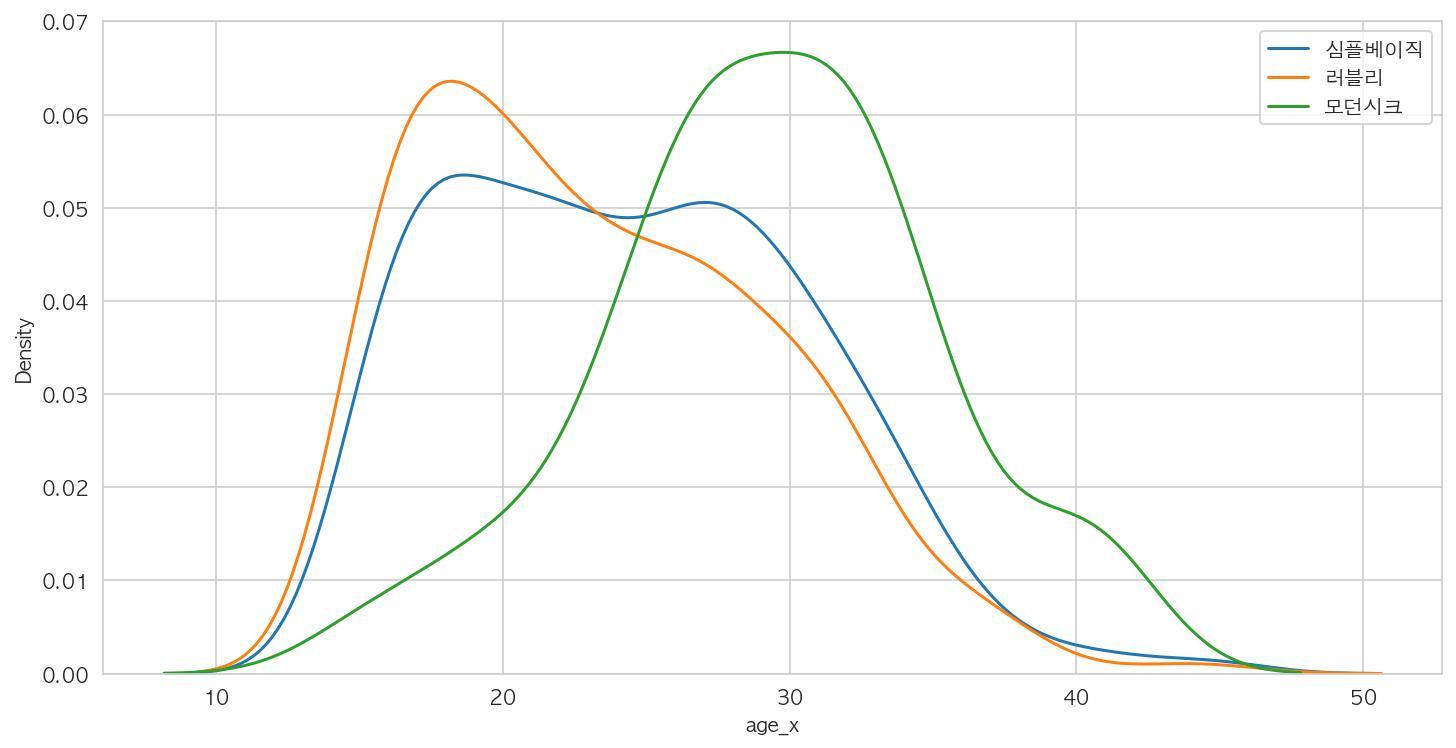

In [128]:
# 스타일 태그를 새로운 열로 추가
for style in all_styles:
    merged_df[style] = merged_df['style_tags'].apply(lambda tags: style in tags)

# age_y 열을 숫자형으로 변환
merged_df['age_y'] = pd.to_numeric(merged_df['age_x'], )

# 커널 밀도 추정 그래프 생성
plt.figure(figsize=(12, 6))
sns.kdeplot(data=merged_df[merged_df['심플베이직'] == True], x='age_x', label='심플베이직')
sns.kdeplot(data=merged_df[merged_df['러블리'] == True], x='age_x', label='러블리')
sns.kdeplot(data=merged_df[merged_df['모던시크'] == True], x='age_x', label='모던시크')

plt.legend()
plt.show()

# 데이터베이스 연결 종료
conn.close()